In [5]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [7]:
X_test.shape #each example has 784 dimension

(10000, 28, 28)

In [8]:
y_test.shape

(10000,)

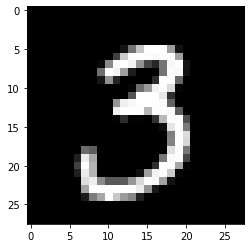

In [9]:
plt.imshow(X_test[90], cmap="gray")

In [10]:
X = X_test.reshape(-1, 28*28)
y = y_test

## Step 1 - Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
X_ = sc.fit_transform(X)

In [14]:
X_.shape

(10000, 784)

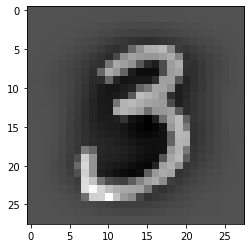

In [15]:
plt.imshow(X_[90].reshape(28,28) , cmap="gray")

## Sklearn PCA

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)#k

In [18]:
Z_pca = pca.fit_transform(X_)

In [19]:
Z_pca.shape

(10000, 2)

In [20]:
pca.explained_variance_

array([41.39893396, 28.35105688])

## Custom PCA

In [21]:
import numpy as np

In [22]:
# Step 2 - Computer Covar matrix
covar = np.dot(X_.T, X_)

In [23]:
covar.shape

(784, 784)

In [24]:
# Step - 3 Computer eigen vectors using SVD
from numpy.linalg import svd
U, S, V = svd(covar)

In [25]:
U.shape

(784, 784)

In [26]:
Ured = U[:, :2]

In [27]:
Ured.shape

(784, 2)

In [28]:
# Step 4 - Projection of Data on New axis(Components)
Z = np.dot(X_, Ured)

In [29]:
Z.shape

(10000, 2)

## Visualize Dataset

In [30]:
import pandas as pd

In [31]:
new_dataset = np.hstack((Z, y.reshape(-1,1)))

In [32]:
dataframe = pd.DataFrame(new_dataset , columns=["PC1", "PC2", "label"])

In [33]:
dataframe.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

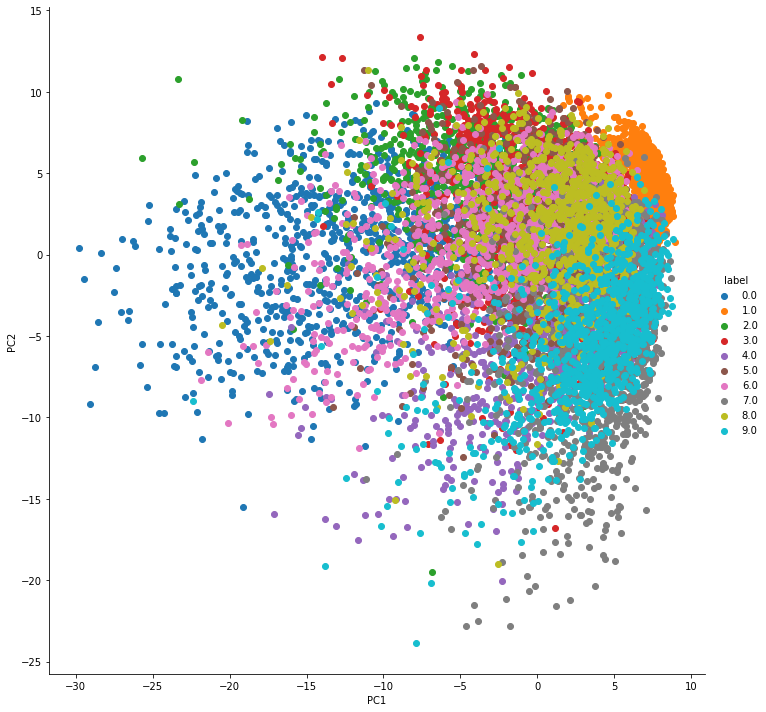

In [34]:
import seaborn as sns
plt.figure(figsize=(15,15))
fg = sns.FacetGrid(dataframe, hue="label", height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()